## Make_regression / classification / blobs

In [1]:
from sklearn.datasets import make_regression

features, target, coefficients = \
    make_regression(n_samples = 100,
                    n_features = 3,
                    n_informative = 3,
                    n_targets = 1,
                    noise = 0.0,
                    coef = True,
                    random_state = 1)

print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Target Vector
 [-10.37865986  25.5124503   19.67705609]


In [2]:
from sklearn.datasets import make_classification

features, target = \
    make_classification(n_samples = 100,
                        n_features = 3,
                        n_informative = 3,
                        n_redundant = 0,
                        n_classes = 2,
                        weights = [.25, .75],
                        random_state = 1)

print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target Vector
 [1 0 0]


In [3]:
from sklearn.datasets import make_blobs

features, target = \
    make_blobs(n_samples = 100,
               n_features = 2,
               centers = 3,
               cluster_std = 0.5,
               shuffle = True,
               random_state = 1)

print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector
 [0 1 1]


## Replace multiple values

In [5]:
import pandas as pd
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/titanic.csv'

df = pd.read_csv(url)

df['Sex'].replace(['female', 'male'], ['Woman', 'Man']).head(5)

0    Woman
1    Woman
2      Man
3    Woman
4      Man
Name: Sex, dtype: object

In [7]:
# replace accepts reg expression
df.replace(r"1st", "First", regex=True).head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",First,29.0,female,1,1
1,"Allison, Miss Helen Loraine",First,2.0,female,0,1


## Renaming columns - useful snippet

In [69]:
import collections

# Create dictionary
column_names = collections.defaultdict(str)

# Create keys
for name in df.columns:
    column_names[name]

# Show dictionary
column_names

defaultdict(str,
            {'Name': '',
             'PClass': '',
             'Age': '',
             'Sex': '',
             'Survived': '',
             'SexCode': ''})

## Dropping duplicate rows

In [70]:
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/titanic.csv'

df = pd.read_csv(url)

In [71]:
df.drop_duplicates().head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [72]:
print('Number of Rows in the Original DataFrame:', len(df))
print('Number of Rows after Deduping:', len(df.drop_duplicates()))

Number of Rows in the Original DataFrame: 1313
Number of Rows after Deduping: 1313


In [74]:
df.drop_duplicates(subset=['Sex'])

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


In [75]:
df.drop_duplicates(subset=['Sex'], keep='last')

,Name,PClass,Age,Sex,Survived,SexCode
1307,"Zabour, Miss Tamini",3rd,NaN,female,0,1
1312,"Zimmerman, Leo",3rd,29.0,male,0,0


In [76]:
# Good option when you don't want to simply delete duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1308    False
1309    False
1310    False
1311    False
1312    False
Length: 1313, dtype: bool

## Grouping rows by time

In [78]:
time_index = pd.date_range('06/06/2017', periods=100000, freq='30S')

dataframe = pd.DataFrame(index=time_index)

dataframe['Sale_Amount'] = np.random.randint(1, 10, 100000)

dataframe.resample('W').sum()

,Sale_Amount
2017-06-11,86038
2017-06-18,100384
2017-06-25,100871
2017-07-02,100817
2017-07-09,100403
2017-07-16,10294


In [80]:
dataframe.head(3)

,Sale_Amount
2017-06-06 00:00:00,1
2017-06-06 00:00:30,6
2017-06-06 00:01:00,8


In [81]:
dataframe.resample('2W').mean()

,Sale_Amount
2017-06-11,4.979051
2017-06-25,4.991443
2017-07-09,4.990575
2017-07-23,4.949038


In [82]:
dataframe.resample('M').count()

,Sale_Amount
2017-06-30,72000
2017-07-31,28000


In [83]:
# groupby를 했음에도 Label은 특정 date로 나옴
# label='left'를 주면, groupby되는 첫 번째 index 이름으로 설정
dataframe.resample('M', label='left').count()

,Sale_Amount
2017-05-31,72000
2017-06-30,28000


## Aggregating Operations and Statistics

In [85]:
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/titanic.csv'

df = pd.read_csv(url)

In [86]:
df.agg('min')

Name        Abbing, Mr Anthony
PClass                       *
Age                       0.17
Sex                     female
Survived                     0
SexCode                      0
dtype: object

In [87]:
df.min()

Name        Abbing, Mr Anthony
PClass                       *
Age                       0.17
Sex                     female
Survived                     0
SexCode                      0
dtype: object

In [88]:
df.agg({'Age':['mean'], 'SexCode':['min', 'max']})

,Age,SexCode
mean,30.397989,NaN
min,NaN,0.0
max,NaN,1.0


In [92]:
df.groupby(
    ['PClass', 'Survived']).agg({'Survived':['count']}
   ).reset_index()

PClass Survived      
                  count
0      *        0     1
1    1st        0   129
2    1st        1   193
3    2nd        0   160
4    2nd        1   119
5    3rd        0   573
6    3rd        1   138

## Time series periods / frequenciesW

### pd.Period

In [93]:
W1_2019 = pd.Period('2019', freq = 'W-MON')
W1_2019

Period('2019-01-01/2019-01-07', 'W-MON')

In [94]:
# 1을 더하면 1주를 더한 효과
W1_2019 + 1

Period('2019-01-08/2019-01-14', 'W-MON')

### pd.date_range

In [95]:
# freq='W' defaults to Sunday
Weeks_2020 = pd.date_range('2020-01-01', '2020-12-31', freq='W')
print(Weeks_2020[:6])

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09'],
              dtype='datetime64[ns]', freq='W-SUN')


In [96]:
shift = pd.Timedelta('6 days')

In [100]:
(Weeks_2020 + shift)[:6]

DatetimeIndex(['2020-01-11', '2020-01-18', '2020-01-25', '2020-02-01',
               '2020-02-08', '2020-02-15'],
              dtype='datetime64[ns]', freq=None)

In [105]:
sensor_times

Index([  0.0,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
       ...
       598.1, 598.2, 598.3, 598.4, 598.5, 598.6, 598.7, 598.8, 598.9, 599.0],
      dtype='float64', length=5991)

In [115]:
sensor_times = ((pd.date_range('00:00:00', '00:09:59.9', freq = '100ms')) - pd.to_datetime('00:00:00')).total_seconds()

In [116]:
sensor_times

Index([  0.0,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
       ...
       598.1, 598.2, 598.3, 598.4, 598.5, 598.6, 598.7, 598.8, 598.9, 599.0],
      dtype='float64', length=5991)

## Preprocessing the German climate data

In [121]:
precipitation_dataPath = 'https://opendata.dwd.de/climate_environment/CDC/observations_global/CLIMAT/monthly/qc/precipitation_total/historical/01001_195101_201712.txt'
vapor_dataPath = 'https://opendata.dwd.de/climate_environment/CDC/observations_global/CLIMAT/monthly/qc/vapour_pressure/historical/98836_196801_201712.txt'
sunshine_dataPath = 'https://opendata.dwd.de/climate_environment/CDC/observations_global/CLIMAT/monthly/qc/sunshine_duration/historical/98836_197803_201612.txt'

In [122]:
precipitation_data = pd.read_csv(precipitation_dataPath,delimiter=';')
vapor_data = pd.read_csv(vapor_dataPath,delimiter=';')
sunshine_data = pd.read_csv(sunshine_dataPath,delimiter=';')

In [124]:
precipitation_data.head()

,Jahr,Jan,Feb,Mrz,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Dez
0,1951,48.0,49.0,98.0,61.0,23.0,34.0,44.0,146.0,64.0,89.0,47.0,72.0
1,1952,100.0,24.0,28.0,23.0,16.0,35.0,25.0,19.0,59.0,105.0,56.0,80.0
2,1953,100.0,102.0,50.0,86.0,15.0,16.0,2.0,31.0,113.0,91.0,124.0,127.0
3,1954,31.0,58.0,39.0,50.0,20.0,26.0,65.0,34.0,53.0,90.0,135.0,40.0
4,1955,21.0,10.0,70.0,75.0,3.0,2.0,53.0,105.0,126.0,30.0,103.0,74.0


In [125]:
vapor_data.head()

,Jahr,Jan,Feb,Mrz,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Dez
0,1968,26.4,26.4,28.1,28.1,29.8,29.8,29.8,29.8,29.8,29.8,28.1,28.1
1,1969,26.4,26.4,28.1,29.8,29.8,29.8,29.8,NaN,29.8,29.8,29.8,29.8
2,1970,28.1,28.1,28.1,29.9,29.8,29.9,28.1,29.8,29.8,29.8,29.8,NaN
3,1971,26.4,26.1,26.4,NaN,29.8,28.1,29.8,28.1,NaN,NaN,28.0,NaN
4,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,NaN,NaN,NaN,28.0


In [126]:
sunshine_data.head()

,Jahr,Jan,Feb,Mrz,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Dez
0,1978,NaN,NaN,257.0,NaN,NaN,NaN,NaN,170.0,NaN,NaN,209.0,245.0
1,1979,253.0,NaN,NaN,228.0,207.0,NaN,169.0,NaN,NaN,NaN,NaN,NaN
2,1980,NaN,230.0,249.0,232.0,NaN,NaN,213.0,195.0,195.0,195.0,NaN,197.0
3,1981,NaN,212.0,244.0,NaN,206.0,NaN,193.0,NaN,168.0,148.0,234.0,261.0
4,1982,199.0,174.0,NaN,NaN,212.0,153.0,214.0,NaN,180.0,197.0,271.0,268.0


### Wide to long format

In [127]:
# convert wide format data to long format
precipitation_data = pd.melt(precipitation_data,
                             id_vars = ['Jahr'],
                             value_vars = ['Jan', 'Feb',
                                           'Mrz', 'Apr',
                                           'Mai', 'Jun',
                                           'Jul', 'Aug',
                                           'Sep', 'Okt',
                                           'Nov', 'Dez'])
precipitation_data.head()

,Jahr,variable,value
0,1951,Jan,48.0
1,1952,Jan,100.0
2,1953,Jan,100.0
3,1954,Jan,31.0
4,1955,Jan,21.0


In [128]:
# renaming columns
precipitation_data = precipitation_data.rename(
    columns = {'value': 'Precipitation'})

In [130]:
# melt vapor data
vapor_data = pd.melt(vapor_data,
                     id_vars = ['Jahr'],
                     value_vars = ['Jan', 'Feb',
                                   'Mrz', 'Apr',
                                   'Mai', 'Jun',
                                   'Jul', 'Aug',
                                   'Sep', 'Okt',
                                   'Nov', 'Dez'])
vapor_data = vapor_data.rename(
    columns = {'value': 'Vapour_Pressure'})
vapor_data.head()

,Jahr,variable,Vapour_Pressure
0,1968,Jan,26.4
1,1969,Jan,26.4
2,1970,Jan,28.1
3,1971,Jan,26.4
4,1972,Jan,NaN


In [131]:
# melt sunshine data
sunshine_data = pd.melt(sunshine_data,
                        id_vars = ['Jahr'],
                        value_vars= ['Jan','Feb',
                                     'Mrz','Apr',
                                     'Mai','Jun',
                                     'Jul','Aug',
                                     'Sep','Okt',
                                     'Nov','Dez'])
sunshine_data = sunshine_data.rename(
    columns={"value": "Sun_shine"})
sunshine_data.head()

,Jahr,variable,Sun_shine
0,1978,Jan,NaN
1,1979,Jan,253.0
2,1980,Jan,NaN
3,1981,Jan,NaN
4,1982,Jan,199.0


### Merge data

In [132]:
conDf = pd.merge(precipitation_data, vapor_data,
                 how='inner', on=['Jahr', 'variable'])
conDf.head()

,Jahr,variable,Precipitation,Vapour_Pressure
0,1968,Jan,49.0,26.4
1,1969,Jan,19.0,26.4
2,1970,Jan,19.0,28.1
3,1971,Jan,51.0,26.4
4,1972,Jan,50.0,NaN


In [133]:
conDf = pd.merge(conDf, sunshine_data,
                 how='inner', on=['Jahr', 'variable'])
conDf.head()

,Jahr,variable,Precipitation,Vapour_Pressure,Sun_shine
0,1978,Jan,62.0,28.1,NaN
1,1979,Jan,61.0,28.1,253.0
2,1980,Jan,60.0,NaN,NaN
3,1981,Jan,78.0,28.1,NaN
4,1982,Jan,59.0,28.0,199.0


In [136]:
# renaming columns
months = {'Mrz':'Mar', 'Mai':'May', 'Okt':'Oct', 'Dez': 'Dec'}

conDf['variable'] = conDf['variable'].map(months)\
    .fillna(conDf['variable'])

conDf.tail()

,Jahr,variable,Precipitation,Vapour_Pressure,Sun_shine
415,2012,Dec,42.0,29.8,220.0
416,2013,Dec,51.0,30.6,217.0
417,2014,Dec,70.0,30.2,234.0
418,2015,Dec,40.0,29.9,274.0
419,2016,Dec,63.0,29.9,229.0


In [137]:
conDf = conDf.rename(columns={'Jahr':'Year'})
conDf.head()

,Year,variable,Precipitation,Vapour_Pressure,Sun_shine
0,1978,Jan,62.0,28.1,NaN
1,1979,Jan,61.0,28.1,253.0
2,1980,Jan,60.0,NaN,NaN
3,1981,Jan,78.0,28.1,NaN
4,1982,Jan,59.0,28.0,199.0


### Data interpolation

In [138]:
# sorting by year and month
## change variable as an alphabetical order to numerical order

conDf['months'] = conDf['variable']
conDf.head(3)

,Year,variable,Precipitation,Vapour_Pressure,Sun_shine,months
0,1978,Jan,62.0,28.1,NaN,Jan
1,1979,Jan,61.0,28.1,253.0,Jan
2,1980,Jan,60.0,NaN,NaN,Jan


In [139]:
monthsMap = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,
             'May':5, 'Jun':6, 'Jul':7, 'Aug':8,
             'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

conDf['months'] = conDf['months'].map(monthsMap)\
    .fillna(conDf['months'])
conDf

,Year,variable,Precipitation,Vapour_Pressure,Sun_shine,months
0,1978,Jan,62.0,28.1,NaN,1
1,1979,Jan,61.0,28.1,253.0,1
2,1980,Jan,60.0,NaN,NaN,1
3,1981,Jan,78.0,28.1,NaN,1
4,1982,Jan,59.0,28.0,199.0,1
...,...,...,...,...,...,...
415,2012,Dec,42.0,29.8,220.0,12
416,2013,Dec,51.0,30.6,217.0,12
417,2014,Dec,70.0,30.2,234.0,12
418,2015,Dec,40.0,29.9,274.0,12


In [140]:
newCondf = conDf.sort_values(by=['Year', 'months'])
newCondf

,Year,variable,Precipitation,Vapour_Pressure,Sun_shine,months
0,1978,Jan,62.0,28.1,NaN,1
35,1978,Feb,25.0,NaN,NaN,2
70,1978,Mar,45.0,28.1,257.0,3
105,1978,Apr,32.0,26.4,NaN,4
140,1978,May,77.0,NaN,NaN,5
...,...,...,...,...,...,...
279,2016,Aug,56.0,30.9,224.0,8
314,2016,Sep,123.0,30.3,175.0,9
349,2016,Oct,75.0,30.6,187.0,10
384,2016,Nov,103.0,29.9,201.0,11


In [141]:
# Impute missing values
cleanDf1 = newCondf.interpolate(method='linear',
                                limit_direction='both')

cleanDf1

,Year,variable,Precipitation,Vapour_Pressure,Sun_shine,months
0,1978,Jan,62.0,28.100000,257.0,1
35,1978,Feb,25.0,28.100000,257.0,2
70,1978,Mar,45.0,28.100000,257.0,3
105,1978,Apr,32.0,26.400000,239.6,4
140,1978,May,77.0,26.683333,222.2,5
...,...,...,...,...,...,...
279,2016,Aug,56.0,30.900000,224.0,8
314,2016,Sep,123.0,30.300000,175.0,9
349,2016,Oct,75.0,30.600000,187.0,10
384,2016,Nov,103.0,29.900000,201.0,11


In [144]:
# groupby methods
Q1 = cleanDf1.groupby(['variable'])['Vapour_Pressure']\
    .agg('mean').loc['Jan']
Q1

28.96227011084154

## Tidy Data
1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each value must have its own cell.

In [320]:
pew = pd.read_csv("https://github.com/chendaniely/pandas_for_everyone/blob/master/data/pew.csv?raw=true")


In [324]:
pew.head(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76


In [328]:
pew_long = pew.melt(id_vars='religion', var_name='income', value_name='count')

In [331]:
pew_long.sort_values('religion').head()

,religion,income,count
0,Agnostic,<$10k,27
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96
126,Agnostic,$100-150k,109
36,Agnostic,$20-30k,60


In [333]:
billboard = pd.read_csv("https://github.com/chendaniely/pandas_for_everyone/blob/master/data/billboard.csv?raw=true")


In [334]:
billboard.head(3)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [372]:
billboard_long = billboard.melt(
    id_vars = ['year', 'artist', 'track', 'time', 'date.entered'],
    var_name='week',
    value_name='rating'
)

In [376]:
###### SORTING by Artist and Week ######
billboard_long.sort_values(by=['artist', 'week'],
                           key = lambda s: s.str[2:].astype(int) 
                           if s.name!='artist' else s)


,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
317,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0
634,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0
951,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0
1268,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0
...,...,...,...,...,...,...,...
22823,2000,matchbox twenty,Bent,4:12,2000-04-29,wk72,NaN
23140,2000,matchbox twenty,Bent,4:12,2000-04-29,wk73,NaN
23457,2000,matchbox twenty,Bent,4:12,2000-04-29,wk74,NaN
23774,2000,matchbox twenty,Bent,4:12,2000-04-29,wk75,NaN


### Columns contain multiple variables

In [377]:
ebola = pd.read_csv("https://github.com/chendaniely/pandas_for_everyone/blob/master/data/country_timeseries.csv?raw=true")


In [378]:
ebola.head(3)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN


In [379]:
ebola_long = ebola.melt(id_vars=['Date', 'Day'])

In [381]:
ebola_long.head(3)

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0


In [382]:
variable_split = ebola_long.variable.str.split('_')
variable_split.head(3)

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
Name: variable, dtype: object

In [391]:
variable_split.get(0)

['Cases', 'Guinea']

In [390]:
variable_split.str.get(0)

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [392]:
status_values = variable_split.str.get(0)
country_values = variable_split.str.get(1)

In [393]:
ebola_long['status'] = status_values
ebola_long['country'] = country_values

In [394]:
ebola_long.head(3)

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea


In [396]:
##### 위와 다르게 하는 방법
ebola_long = ebola.melt(id_vars=['Date', 'Day'])

variable_split = ebola_long.variable.str.split('_', expand=True)

ebola_long[['status', 'country']] = variable_split

ebola_long.head(3)

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea


## Apply Functions

In [397]:
df = pd.DataFrame({"a": [10, 20, 30], "b": [20, 30, 40]})

# argument가 2개인 함수 apply
def my_exp(x, e):
    return x ** e

df['a'].apply(my_exp, e=2)

0    100
1    400
2    900
Name: a, dtype: int64

### Apply의 동작
- when we use .apply(), **the entire column** is passed into the **first** argument.

In [ ]:
def avg_3(x, y, z):
    return (x + y + z) / 3

df.apply(avg_3) # error

In [400]:
def avg_3_apply(col):
    x = col[0]
    y = col[1]
    z = col[2]
    return (x + y + z) / 3

In [401]:
df.apply(avg_3_apply)

a    20.0
b    30.0
dtype: float64

In [407]:
def agg(col):
    return col.sum() / len(col)

In [408]:
df.apply(agg)

a    20.0
b    30.0
dtype: float64

### Row-wise
- axis=1 을 주면, the **entire row** is used as the **first** argument.

In [410]:
df.apply(agg, axis=1)

0    15.0
1    25.0
2    35.0
dtype: float64

In [412]:
def avg_2_apply(col):
    x = col[0]
    y = col[1]
    return (x + y) / 2

In [414]:
df.apply(avg_2_apply, axis=1)

0    15.0
1    25.0
2    35.0
dtype: float64

## Groupby Methods

### Pandas Method
- count (not incluing NaN values)
- size (including NaN values)
- mean
- std
- min
- quantile
- max
- sum
- var
- sem
- describe
- first
- last
- nth

### Numpy Scipy Methods (agg function)
- np.count_nonzero()
- np.mean()
- np.std()
- np.min()
- np.percentile()
- np.max()
- np.sum()
- np.var()
- scipy.stats.sem()
- scipy.stats.describe()

### Custom Functions with agg

In [424]:
df = pd.read_csv('https://github.com/chendaniely/pandas_for_everyone/blob/master/data/gapminder.tsv?raw=true', sep='\t')

def my_mean(values):
    return values.sum() / len(values)

In [425]:
df.groupby('year')['lifeExp'].agg(np.mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [426]:
df.groupby('year')['lifeExp'].agg(my_mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

### agg function with dict

In [429]:
gdf_dict = df.groupby('year').agg(
    {
        'lifeExp': 'mean',
        'pop': 'median',
        'gdpPercap': 'median'
    }
)

gdf_dict

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,3943953.0,1968.528344
1957,51.507401,4282942.0,2173.220291
1962,53.609249,4686039.5,2335.439533
1967,55.678290,5170175.5,2678.334740
1972,57.647386,5877996.5,3339.129407
1977,59.570157,6404036.5,3798.609244
1982,61.533197,7007320.0,4216.228428
1987,63.212613,7774861.5,4280.300366
1992,64.160338,8688686.5,4386.085502


## Transform

In [430]:
def my_zscore(x):
    return ((x - x.mean()) / x.std())

In [431]:
transform_z = df.groupby('year')['lifeExp'].transform(my_zscore)

transform_z

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
          ...   
1699   -0.081621
1700   -0.336974
1701   -1.574962
1702   -2.093346
1703   -1.948180
Name: lifeExp, Length: 1704, dtype: float64

### Missing Value Example

In [432]:
np.random.seed(42)

tips_10 = sns.load_dataset('tips').sample(10)

# randomly pick 4 'total_bill' values and turn them into missing
tips_10.loc[
    np.random.permutation(tips_10.index)[:4],
    'total_bill'
] = np.NaN

print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153         NaN  2.00    Male     No   Sun  Dinner     4
211         NaN  5.16    Male    Yes   Sat  Dinner     4
198         NaN  2.00  Female    Yes  Thur   Lunch     2
176         NaN  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [448]:
def fill_na_mean(x):
    avg = x.mean()
    return x.fillna(avg)

total_bill_group_mean = (
    tips_10
    .groupby('sex')
    .total_bill
    .transform(fill_na_mean)
)

tips_10['fill_total_bill'] = total_bill_group_mean

### Filter

In [451]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [452]:
tips['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [453]:
tips_filtered = (
    tips
    .groupby('size')
    .filter(lambda x: x['size'].count() >= 30)
)

In [454]:
tips_filtered['size'].value_counts()

size
2    156
3     38
4     37
Name: count, dtype: int64

In [464]:
#### refs ####
tips.groupby('size')['size'].count()

size
1      4
2    156
3     38
4     37
5      5
6      4
Name: size, dtype: int64

### Groupby Object

In [466]:
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)

grouped = tips_10.groupby('sex')
grouped

In [467]:
grouped.groups

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}

In [469]:
grouped.mean(numeric_only=True)

,total_bill,tip,size
sex,,,
Male,20.02,2.875714,2.571429
Female,13.62,2.506667,2.000000


In [471]:
female = grouped.get_group('Female')
female

,total_bill,tip,sex,smoker,day,time,size
198,13.00,2.00,Female,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


## Missing Values

### Load Data - nan
- `pd.read_csv(na_values=['-', 99])` : 예를 들어 '-', 99를 nan으로 불러온다

## String Methods

In [23]:
"black Knight".capitalize()

'Black knight'

In [26]:
"It's just a flesh wound!".count('u')

2

In [27]:
"Halt! Who goes there?".startswith('Halt')

True

In [28]:
"coconut".endswith('nut')

True

In [29]:
"It's just a flesh wound!".find('u')

6

In [33]:
"It's just a flesh wound!".index('flesh')

12

In [34]:
"old woman".isalpha()  # there is a whitespace

False

In [35]:
"37".isdecimal()

True

In [37]:
"I'm 37".isalnum()  #apostrophe and space

False

In [38]:
"Black Knight".lower()

'black knight'

In [39]:
"Black Knight".upper()

'BLACK KNIGHT'

In [40]:
"flesh wound!".replace('flesh wound', 'scratch')

'scratch!'

In [41]:
" I'm not dead.    ".strip()

"I'm not dead."

In [43]:
"NI! NI! NI! NI!".split(sep=' ')

['NI!', 'NI!', 'NI!', 'NI!']

In [46]:
"3,4".partition(',')

('3', ',', '4')

In [51]:
"nine".center(10)

'   nine   '

In [54]:
"9".zfill(5)

'00009'

In [55]:
multi_str = """Guard: What? Ridden on a horse?
King Arthur: Yes!
Guard: You're using coconuts!
King Arthur: What?
Guard: You've got ... coconut[s] and you're bangin' 'em together.
"""

print(multi_str)

Guard: What? Ridden on a horse?
King Arthur: Yes!
Guard: You're using coconuts!
King Arthur: What?
Guard: You've got ... coconut[s] and you're bangin' 'em together.


In [56]:
multi_str_split = multi_str.splitlines()

In [57]:
print(multi_str_split)

['Guard: What? Ridden on a horse?', 'King Arthur: Yes!', "Guard: You're using coconuts!", 'King Arthur: What?', "Guard: You've got ... coconut[s] and you're bangin' 'em together."]


In [58]:
# use the format specification mini-language
digits = 67890
s = f"In 2005, Lu Chao of China recited {67890:,} digits of pi."
print(s)

In 2005, Lu Chao of China recited 67,890 digits of pi.


In [59]:
prop = 7 / 67890
s = f"I remember {prop:.4} or {prop:.4%} of what Lu Chao recited."
print(s)

I remember 0.0001031 or 0.0103% of what Lu Chao recited.


In [60]:
id = 42
print(f"My ID number is {id:05d}")

My ID number is 00042


## Dates and Time

In [61]:
from datetime import datetime

In [62]:
t1 = datetime.now()
t2 = datetime(1970, 1,1)

diff = t1 - t2
print(diff)

19647 days, 0:24:37.625190


In [63]:
print(type(diff))

<class 'datetime.timedelta'>


In [67]:
t1.year, t1.month, t1.day

(2023, 10, 17)

In [ ]:
url = "https://github.com/chendaniely/pandas_for_everyone/blob/master/data/banklist.csv?raw=true"
banks = pd.read_csv(url,
                   parse_dates=['Closing Date', 'Updated Date'])

banks.head(3)

In [73]:
banks = banks.assign(
    closing_quarter = banks['Closing Date'].dt.quarter,
    closing_year = banks['Closing Date'].dt.year
)

closing_year = banks.groupby(['closing_year']).size()

In [75]:
closing_year_q = (
  banks
  .groupby(['closing_year', 'closing_quarter'])
  .size()
)

In [77]:
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

## Reindex

## pd.Series Methods
- append
- corr
- cov
- describe
- drop_duplicates
- equals
- get_values
- hist
- isin
- min
- max
- mean
- median
- mode
- quantile
- replace
- sample
- sort_values
- to_frame
- transpose
- unique

## sample to randomzie index

In [235]:
df = pd.read_csv("https://github.com/chendaniely/pandas_for_everyone/blob/master/data/billboard.csv?raw=true")

df = df.sample(frac=1, random_state=42)
df.head(5)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
73,2000,De La Soul,All Good?,5:02,2000-12-23,96,96.0,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,2000,"Strait, George",The Best Day,3:24,2000-01-29,73,64.0,54.0,45.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2000,"Backstreet Boys, The",The One,3:46,2000-05-27,58,50.0,43.0,37.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,2000,SheDaisy,Deck The Halls,3:46,1999-12-25,97,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,76,76.0,74.0,69.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
# randomize 'time'
df['time'] = df['time'].sample(frac=1, random_state=42)

In [238]:
df.head(5)
# 위처럼 하면 바뀌지 않는다.
# 왜냐면 pandas는 index와 value가 join되어 있기 때문임

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
73,2000,De La Soul,All Good?,5:02,2000-12-23,96,96.0,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,2000,"Strait, George",The Best Day,3:24,2000-01-29,73,64.0,54.0,45.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2000,"Backstreet Boys, The",The One,3:46,2000-05-27,58,50.0,43.0,37.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,2000,SheDaisy,Deck The Halls,3:46,1999-12-25,97,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,76,76.0,74.0,69.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
# index info를 없애고 values로 넣어주면 된다
df['time'] = (
    df['time']
        .sample(frac=1, random_state=42)
        .values
)

In [250]:
df.head(5)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
73,2000,De La Soul,All Good?,4:18,2000-12-23,96,96.0,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,2000,"Strait, George",The Best Day,3:54,2000-01-29,73,64.0,54.0,45.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2000,"Backstreet Boys, The",The One,2:52,2000-05-27,58,50.0,43.0,37.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,2000,SheDaisy,Deck The Halls,4:57,1999-12-25,97,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,"Adams, Yolanda",Open My Heart,4:18,2000-08-26,76,76.0,74.0,69.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## df.values to return numpy array

In [171]:
df.values

array([[2000, '2 Pac', "Baby Don't Cry (Keep...", ..., nan, nan, nan],
       [2000, '2Ge+her', 'The Hardest Part Of ...', ..., nan, nan, nan],
       [2000, '3 Doors Down', 'Kryptonite', ..., nan, nan, nan],
       ...,
       [2000, 'Ying Yang Twins', 'Whistle While You Tw...', ..., nan,
        nan, nan],
       [2000, 'Zombie Nation', 'Kernkraft 400', ..., nan, nan, nan],
       [2000, 'matchbox twenty', 'Bent', ..., nan, nan, nan]],
      dtype=object)

## subtracting / astype the date values

In [251]:
df = pd.read_csv("https://github.com/chendaniely/pandas_for_everyone/blob/master/data/scientists.csv?raw=true")

In [252]:
born_datetime = pd.to_datetime(df['Born'], format='%Y-%m-%d')
died_datetime = pd.to_datetime(df['Died'], format='%Y-%m-%d')

In [253]:
df['born_dt'], df['died_dt'] = (
    born_datetime,
    died_datetime
)

In [254]:
df['age_days'] = (
    df['died_dt'] - df['born_dt']
)

In [275]:
# convert dt values to 'year' using astype method
#### not working ####
# df['age_years'] = (
#     df['age_days'].values.astype('timedelta64[Y]')
# )

df['age_years'] = (
    np.floor(df['age_days'] / np.timedelta64(365, 'D')).astype(int)
)

df.head()

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_years
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,37
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,61
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,90
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,66
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,56


## Modifying columns with assign()

In [277]:
df = df.assign(
    age_days_assign = df['died_dt'] - df['born_dt'],
    age_year_assign = np.floor(df['age_days'] / np.timedelta64(365, 'D')).astype(int)
)

df.head(2)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_years,age_days_assign,age_year_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,37,13779 days,37
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,61,22404 days,61


In [280]:
## assign의 benefit은 앞서 지정한 칼럼 값을 뒤이어 지정할 칼럼에 사용할 수 있다는 것
## 그렇게 하려면 lambda를 사용해야 한다.

df = df.assign(
    age_days_assign = df['died_dt'] - df['born_dt'],
    age_year_assign = lambda df_: np.floor(df_["age_days_assign"] / np.timedelta64(365,'D'))\
        .astype(int)
)

df.head(2)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_years,age_days_assign,age_year_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,37,13779 days,37
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,61,22404 days,61


## Plotting Basics

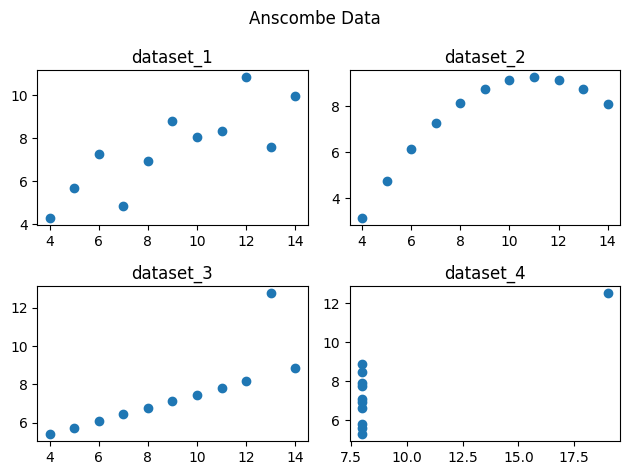

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

anscombe = sns.load_dataset("anscombe")

dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

# you need to run all the plotting code together, same as above
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

# add a small title to each subplot
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

# add a title for the entire figure (title above the title)
fig.suptitle("Anscombe Data") # note spelling of "suptitle"

# use a tight layout so the plots and titles don't overlap
fig.set_tight_layout(True)

# show the figure
plt.show()

## Statistical Graphics

In [285]:
tips = sns.load_dataset("tips")

### Histogram

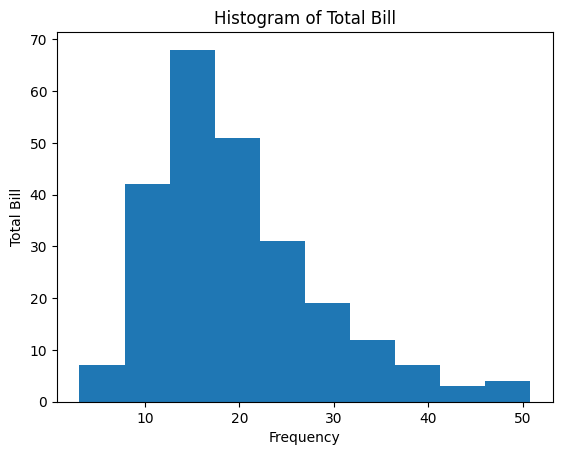

In [286]:
# create the figure object
fig = plt.figure()

# subplot has 1 row, 1 column, plot location 1
axes1 = fig.add_subplot(1, 1, 1)

# make the actual histogram
axes1.hist(data=tips, x='total_bill', bins=10)

# add labels
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

plt.show()

### Scatter Plot

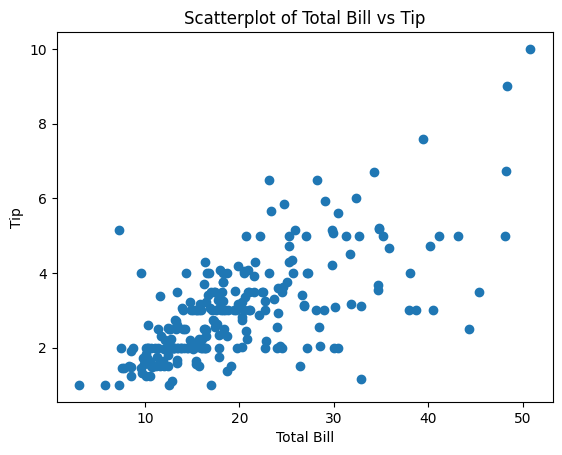

In [287]:
# create the figure object
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)

# make the actual scatter plot
axes1.scatter(data=tips, x='total_bill', y='tip')

# add labels
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

plt.show()

### Boxplot 

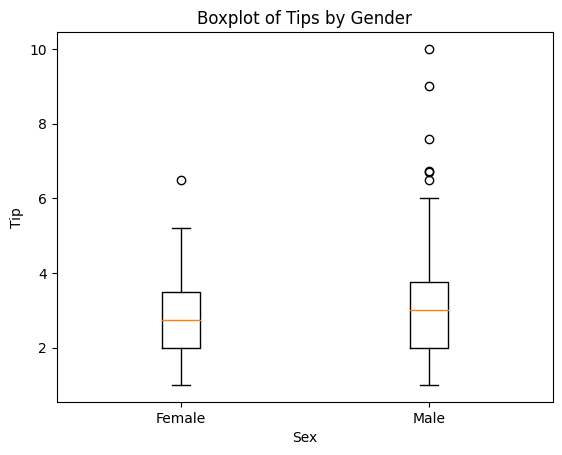

In [289]:
# create the figure object
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)

# make the actual box plot
axes1.boxplot(
  # first argument of box plot is the data
  # since we are plotting multiple pieces of data
  # we have to put each piece of data into a list
  x=[
      tips.loc[tips["sex"] == "Female", "tip"],
      tips.loc[tips["sex"] == "Male", "tip"],
  ],
  # we can then pass in an optional labels parameter
  # to label the data we passed
  labels=["Female", "Male"],
)


# add labels
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Gender')

plt.show()

### Multivariate

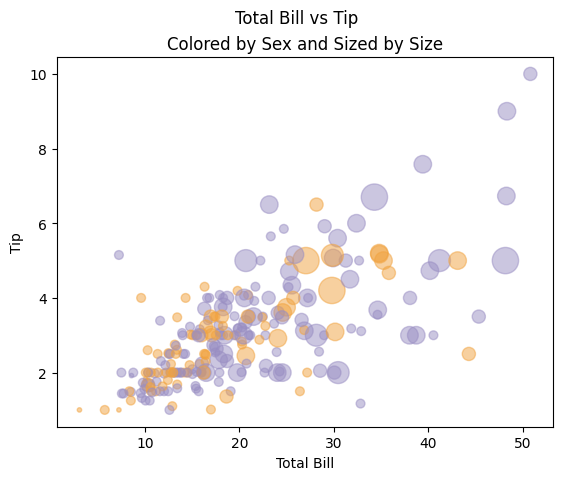

In [290]:
# assign color values
colors = {
    "Female": "#f1a340",  # orange
    "Male": "#998ec3",    # purple
}

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)

axes1.scatter(
  data=tips,
  x='total_bill',
  y='tip',

  # set the size of the dots based on party size
  # we multiply the values by 10 to make the points bigger
  # and also to emphasize the difference
  s=tips["size"] ** 2 * 10,


  # set the color for the sex using our color values above
  c=tips['sex'].map(colors),

  # set the alpha so points are more transparent
  # this helps with overlapping points
  alpha=0.5
)

# label the axes
axes1.set_title('Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

# figure title on top
scatter_plot.suptitle("Total Bill vs Tip")

plt.show()

## Seaborn

In [291]:
# set the default seaborn context optimized for paper print
# the default is "notebook"
sns.set_context("paper")

### Histogram

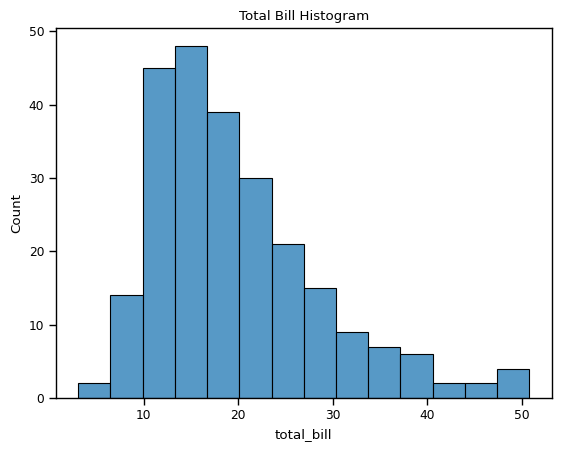

In [292]:
# the subplots function is a shortcut for
# creating separate figure objects and
# adding individual subplots (axes) to the figure
hist, ax = plt.subplots()

# use seaborn to draw a histogram into the axes
sns.histplot(data=tips, x="total_bill", ax=ax)

# use matplotlib notation to set a title
ax.set_title('Total Bill Histogram')

# use matplotlib to show the figure
plt.show()

### Density Plot

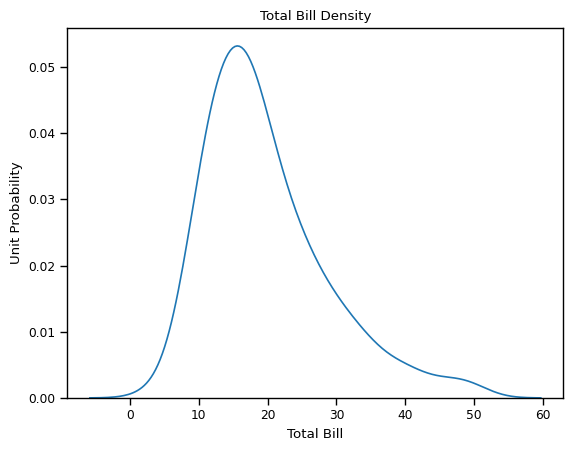

In [293]:
den, ax = plt.subplots()

sns.kdeplot(data=tips, x="total_bill", ax=ax)

ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

plt.show()

### Rug Plot

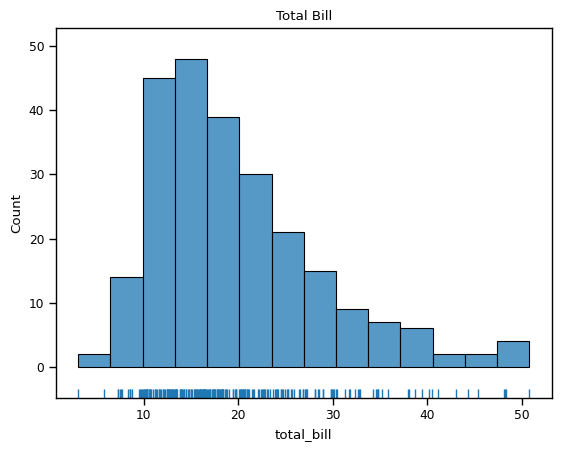

In [294]:
rug, ax = plt.subplots()

# plot 2 things into the axes we created
sns.rugplot(data=tips, x="total_bill", ax=ax)
sns.histplot(data=tips, x="total_bill", ax=ax)

ax.set_title("Rug Plot and Histogram of Total Bill")
ax.set_title("Total Bill")

plt.show()

### Distribution Plot

/Users/jihunkang/.pyenv/versions/3.9.1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


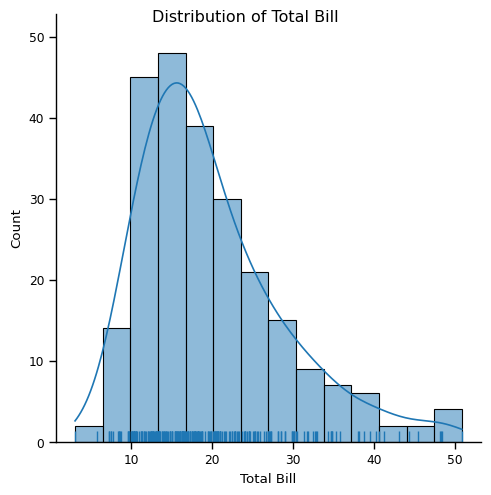

In [295]:
# the FacetGrid object creates the figure and axes for us
fig = sns.displot(data=tips, x="total_bill", kde=True, rug=True)

fig.set_axis_labels(x_var="Total Bill", y_var="Count")
fig.figure.suptitle('Distribution of Total Bill')

plt.show()

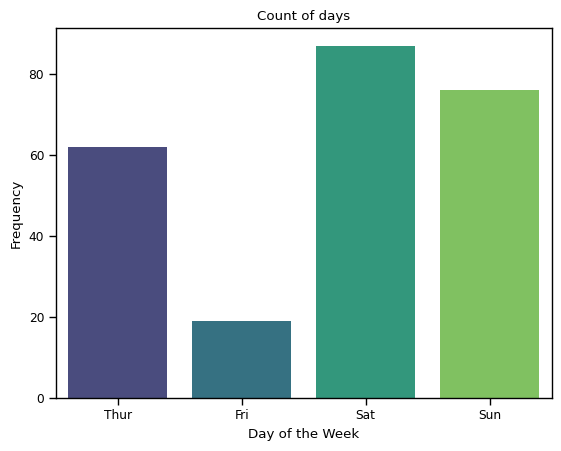

In [296]:
count, ax = plt.subplots()

# we can use the viridis palette to help distinguish the colors
sns.countplot(data=tips, x='day', palette="viridis", ax=ax)

ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

plt.show()

### Scatter Plot

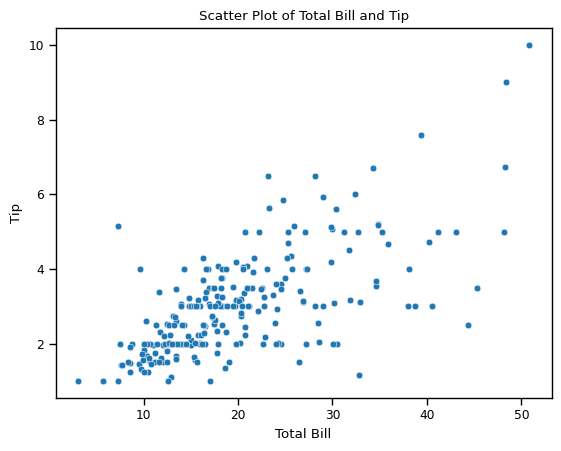

In [297]:
scatter, ax = plt.subplots()

# use fit_reg=False if you do not want the regression line
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=ax)

ax.set_title('Scatter Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()

### Regression Plot

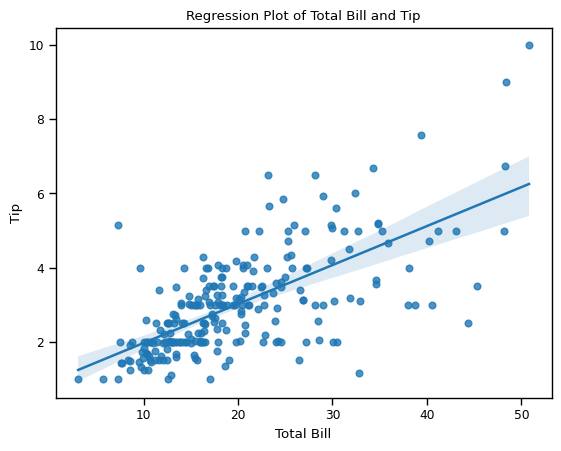

In [298]:
reg, ax = plt.subplots()

# use fit_reg=False if you do not want the regression line
sns.regplot(data=tips, x='total_bill', y='tip', ax=ax)

ax.set_title('Regression Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()

### Joint Plot

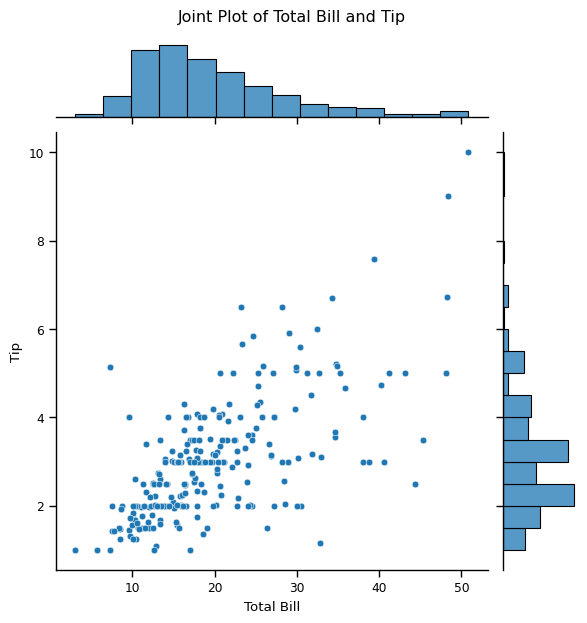

In [300]:
# jointplot creates the figure and axes for us
joint = sns.jointplot(data=tips, x='total_bill', y='tip')

joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

# add a title and move the text up so it doesn't clash with histogram
joint.figure.suptitle('Joint Plot of Total Bill and Tip', y=1.03)

plt.show()

### Hexbin Plot

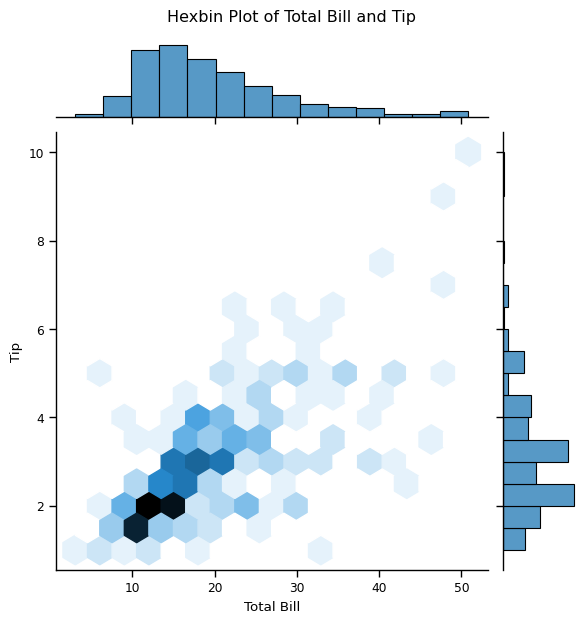

In [301]:
# we can use jointplot with kind="hex" for a hexbin plot
hexbin = sns.jointplot(
  data=tips, x="total_bill", y="tip", kind="hex"
)

hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.figure.suptitle('Hexbin Plot of Total Bill and Tip', y=1.03)

plt.show()

### 2D Density Plot

/var/folders/z3/0n9cxghs7fz_xy1kjbg201gr0000gn/T/ipykernel_31177/1454627863.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tips, x="total_bill", y="tip", shade=True, ax=ax)


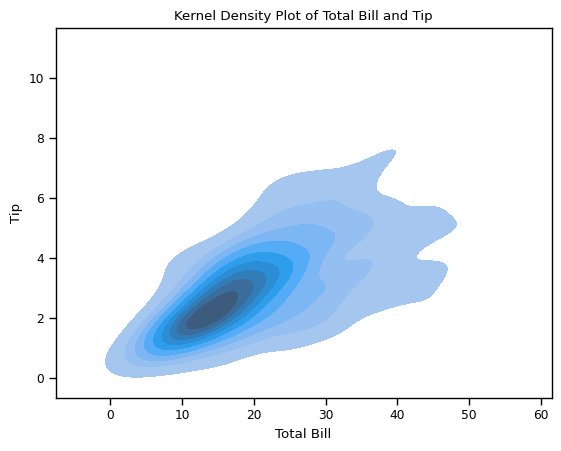

In [302]:
kde, ax = plt.subplots()

# shade will fill in the contours
sns.kdeplot(data=tips, x="total_bill", y="tip", shade=True, ax=ax)

ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()

### 2D KDE Plot

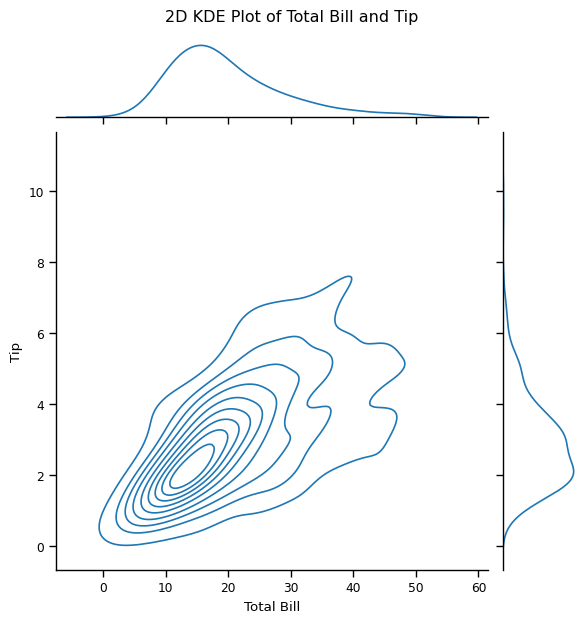

In [303]:
kde2d = sns.jointplot(data=tips, x="total_bill", y="tip", kind="kde")

kde2d.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
kde2d.fig.suptitle('2D KDE Plot of Total Bill and Tip', y=1.03)

plt.show()

### Bar Plot

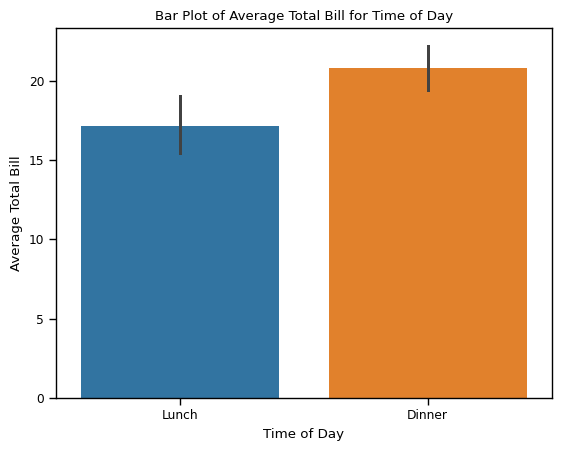

In [304]:
import numpy as np

bar, ax = plt.subplots()

# plot the average total bill for each value of time
# mean is calculated using numpy
sns.barplot(
  data=tips, x="time", y="total_bill", estimator=np.mean, ax=ax
)

ax.set_title('Bar Plot of Average Total Bill for Time of Day')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Average Total Bill')

plt.show()

### Box Plot

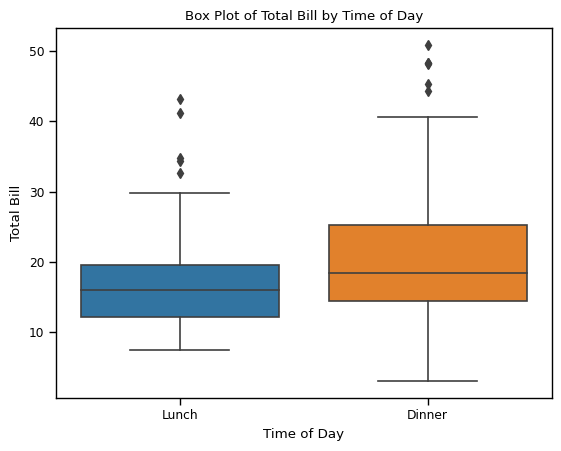

In [306]:
box, ax = plt.subplots()

# the y is optional, but x would have to be a numeric variable
sns.boxplot(data=tips, x='time', y='total_bill', ax=ax)

ax.set_title('Box Plot of Total Bill by Time of Day')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Total Bill')

plt.show()

### Violin Plot

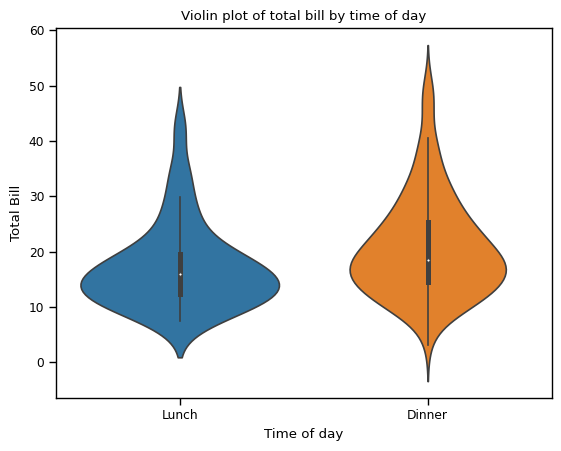

In [307]:
violin, ax = plt.subplots()

sns.violinplot(data=tips, x='time', y='total_bill', ax=ax)

ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

plt.show()

### Multivariate

### Colors

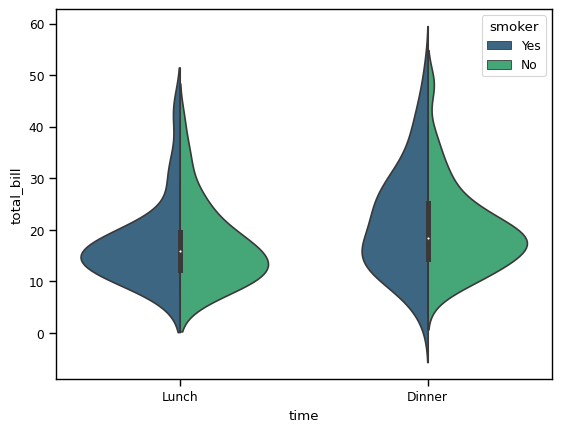

In [309]:
violin, ax = plt.subplots()

sns.violinplot(
  data=tips,
  x="time",
  y="total_bill",
  hue="smoker", # set color based on smoker variable
  split=True,
  palette="viridis", # palette specifies the colors for hue

  ax=ax,
)

plt.show()

/Users/jihunkang/.pyenv/versions/3.9.1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/jihunkang/.pyenv/versions/3.9.1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


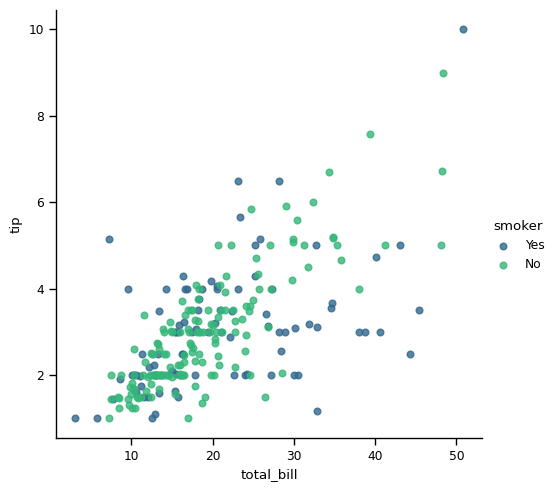

In [310]:
# note the use of lmplot instead of regplot to return a figure
scatter = sns.lmplot(
  data=tips,
  x="total_bill",
  y="tip",
  hue="smoker",
  fit_reg=False,
  palette="viridis",
)

plt.show()

### Size and Shape

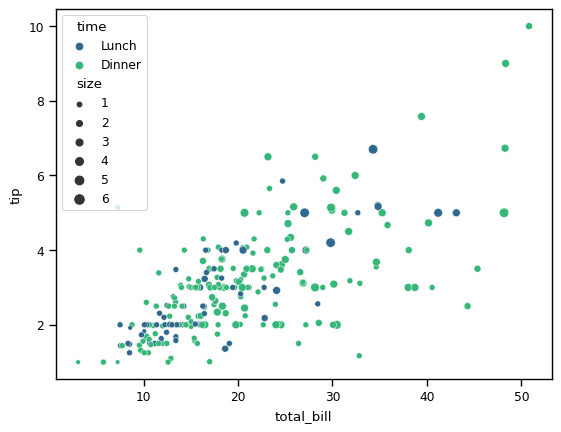

In [311]:
fig, ax = plt.subplots()

sns.scatterplot(
  data=tips,
  x="total_bill",
  y="tip",
  hue="time",
  size="size",
  palette="viridis",
  ax=ax,
)

plt.show()

## Facets

/Users/jihunkang/.pyenv/versions/3.9.1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


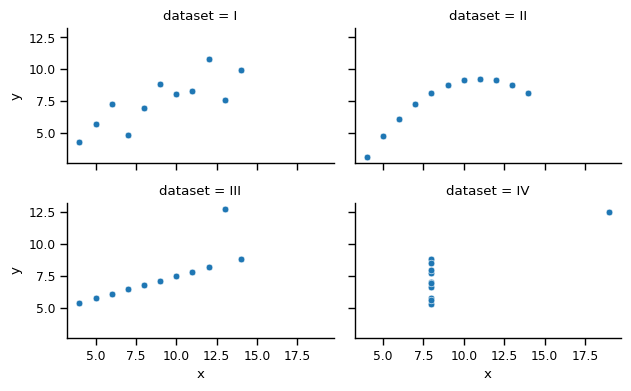

In [314]:
anscombe_plot = sns.relplot(
  data=anscombe,
  x="x",
  y="y",
  kind="scatter",
  col="dataset",

  col_wrap=2,
  height=2,
  aspect=1.6, # aspect ratio of each facet
)

anscombe_plot.figure.set_tight_layout(True)

plt.show()

/Users/jihunkang/.pyenv/versions/3.9.1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


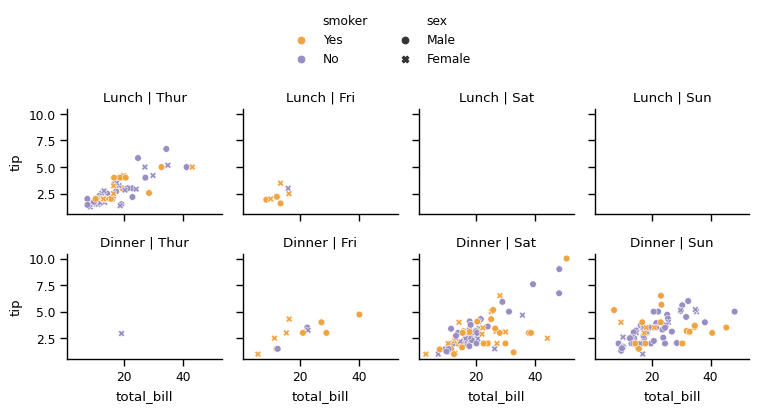

In [315]:
colors = {
  "Yes": "#f1a340", # orange
  "No" : "#998ec3", # purple
}
# make the faceted scatter plot
# this is the only part that is needed to draw the figure
facet2 = sns.relplot(
  data=tips,
  x="total_bill",
  y="tip",
  hue="smoker",
  style="sex",

  kind="scatter",
  col="day",
  row="time",
  palette=colors,
  height=1.7, # adjusted to fit figure on page
)

# below is to make the plot pretty
# adjust facet titles
facet2.set_titles(
  row_template="{row_name}",
  col_template="{col_name}"
)

# adjust the legend to not have it overlap the figure
sns.move_legend(
  facet2,
  loc="lower center",
  bbox_to_anchor=(0.5, 1),
  ncol=2,   #number legend columns
  title=None,   #legend title
  frameon=False, #remove frame (i.e., border box) around legend
)

facet2.figure.set_tight_layout(True)

plt.show()

## FacetGrid

/Users/jihunkang/.pyenv/versions/3.9.1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


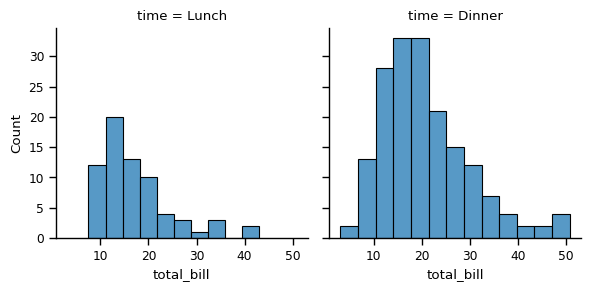

In [316]:
# create the FacetGrid
facet = sns.FacetGrid(tips, col='time')

# for each value in time, plot a histogram of total bill
# you pass in parameters as if you were passing them directly
# into sns.histplot()
facet.map(sns.histplot, 'total_bill')
plt.show()

/Users/jihunkang/.pyenv/versions/3.9.1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


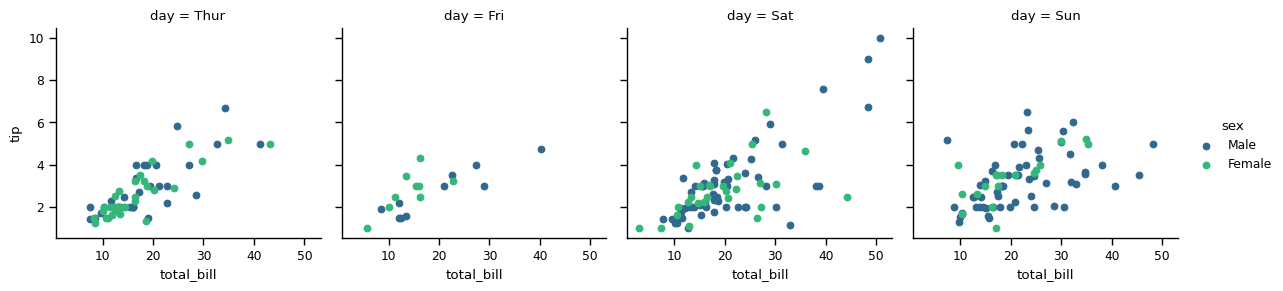

In [317]:
facet = sns.FacetGrid(
  tips, col='day', hue='sex', palette="viridis"
)
facet.map(plt.scatter, 'total_bill', 'tip')
facet.add_legend()
plt.show()

/Users/jihunkang/.pyenv/versions/3.9.1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


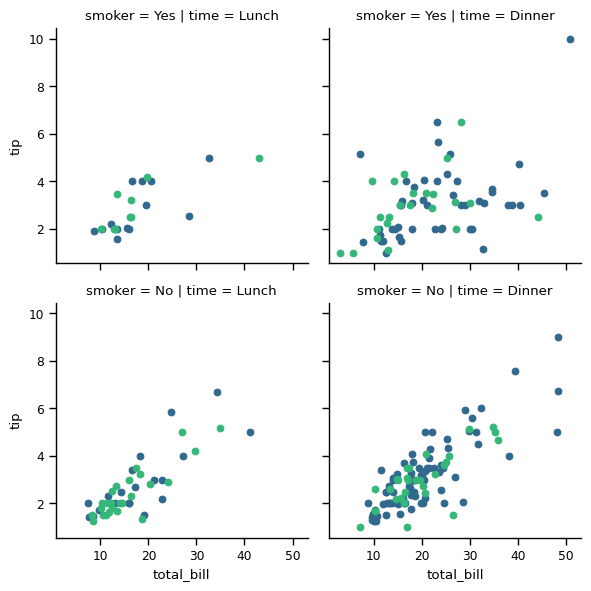

In [318]:
facet = sns.FacetGrid(
  tips, col='time', row='smoker', hue='sex', palette="viridis"
)
facet.map(plt.scatter, 'total_bill', 'tip')
plt.show()

/Users/jihunkang/.pyenv/versions/3.9.1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


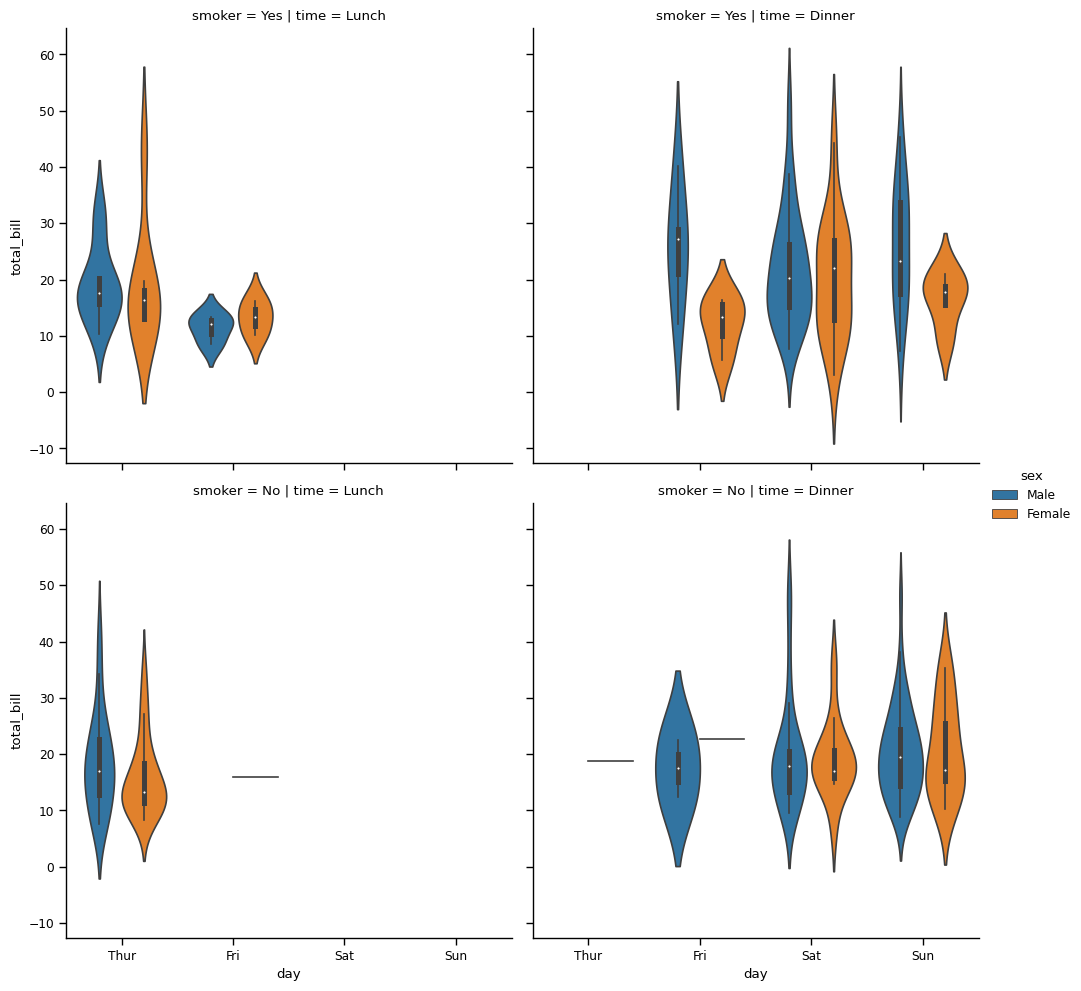

In [319]:
facet = sns.catplot(
    x="day",
    y="total_bill",
    hue="sex",
    data=tips,
    row="smoker",
    col="time",
    kind="violin",
)
plt.show()

## Finance

In [10]:
import pandas as pd
import yfinance as yf

In [25]:
df = yf.download('AAPL',
                 start='2011-01-01',
                 end='2021-12-31',
                 progress=False)

In [26]:
print(f"Downloaded {len(df)} rows of data.")

Downloaded 2768 rows of data.


In [27]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,11.630000,11.795000,11.601429,11.770357,9.990638,445138400
2011-01-04,11.872857,11.875000,11.719643,11.831786,10.042777,309080800
2011-01-05,11.769643,11.940714,11.767857,11.928571,10.124928,255519600
2011-01-06,11.954286,11.973214,11.889286,11.918929,10.116747,300428800
2011-01-07,11.928214,12.012500,11.853571,12.004286,10.189196,311931200


In [29]:
aapl_data = yf.Ticker('AAPL')

In [33]:
aapl_data.history().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2023-09-14 00:00:00-04:00 to 2023-10-13 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          22 non-null     float64
 1   High          22 non-null     float64
 2   Low           22 non-null     float64
 3   Close         22 non-null     float64
 4   Volume        22 non-null     int64  
 5   Dividends     22 non-null     float64
 6   Stock Splits  22 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.4 KB


In [38]:
aapl_data.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,61.32%,% of Shares Held by Institutions
2,61.36%,% of Float Held by Institutions
3,5762,Number of Institutions Holding Shares


In [42]:
aapl_data.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Group Inc,1303688506,2023-06-29,0.0834,233164697255
1,Blackrock Inc.,1039640859,2023-06-29,0.0665,185939773977
2,"Berkshire Hathaway, Inc",915560382,2023-06-29,0.0586,163747979908
3,State Street Corporation,578897858,2023-06-29,0.0370,103535885436
4,"FMR, LLC",307066638,2023-06-29,0.0196,54918870080
5,"Geode Capital Management, LLC",291538165,2023-06-29,0.0186,52141602589
6,Price (T.Rowe) Associates Inc,226650943,2023-06-29,0.0145,40536522538
7,Morgan Stanley,204714950,2023-06-29,0.0131,36613270056
8,Norges Bank Investment Management,167374278,2022-12-30,0.0107,29934890641
9,Northern Trust Corporation,164536073,2023-06-29,0.0105,29427277660


In [47]:
aapl_data.financials

,2022-09-30,2021-09-30,2020-09-30
Tax Effect Of Unusual Items,0.0,0.0,0.0
Tax Rate For Calcs,0.162045,0.133023,0.144282
Normalized EBITDA,130541000000.0,120233000000.0,77344000000.0
Net Income From Continuing Operation Net Minority Interest,99803000000.0,94680000000.0,57411000000.0
Reconciled Depreciation,11104000000.0,11284000000.0,11056000000.0
Reconciled Cost Of Revenue,223546000000.0,212981000000.0,169559000000.0
EBITDA,130541000000.0,120233000000.0,77344000000.0
EBIT,119437000000.0,108949000000.0,66288000000.0
Net Interest Income,-106000000.0,198000000.0,890000000.0
Interest Expense,2931000000.0,2645000000.0,2873000000.0


## Looping for iteration

In [ ]:
# old way
for index, row in df.iterrows():
    # do sth with row['column']

# New way
df['column'] = df['column'] + 1

## agg & groupby function

## Pivot Table

## Multi-index

## 클래스화, 모듈화

## Path

In [2]:
from pathlib import Path

In [3]:
path = Path('My Drive/Data Science/pyexcel-master/data')

In [4]:
path

PosixPath('My Drive/Data Science/pyexcel-master/data')

## xlsxWriter

In [9]:
import xlsxwriter

In [11]:
workbook = xlsxwriter.Workbook('excelfile')

In [ ]:
{'shrink': True,
 'align': 'center',
 'valign': 'vcenter',
 'border': 1,
 'bottom': 6,
 'bg_color': 'green',
 'font_name': '바탕체',
 'font_size': 10,
 'bold': True,
 'center_across': True,}

In [39]:
from pathlib import Path

input_folder = '/Users/jihunkang/My Drive/Data Science/pyexcel-master/data/ch08'

In [52]:
raw_data_dir = Path(input_folder)
excel_files = raw_data_dir.glob('영업팀별_*')

In [53]:
for ex in excel_files:
    print(ex)

/Users/jihunkang/My Drive/Data Science/pyexcel-master/data/ch08/영업팀별_판매현황_세로막대형차트2.xlsx
/Users/jihunkang/My Drive/Data Science/pyexcel-master/data/ch08/영업팀별_판매현황.xlsx
/Users/jihunkang/My Drive/Data Science/pyexcel-master/data/ch08/영업팀별_판매현황_세로막대형차트.xlsx


In [ ]:
for excel_file in excel_files:
    df = pd.read_excel(excel_file)
    total_df = total_df.append(df, ignore_index=True)